In [1]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# setup pytrends Library and keywords define

In [3]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
keyword = "artificial intelligence"


# data Request

In [4]:
pytrends.build_payload([keyword], cat = 0,timeframe = 'today 12-m' , geo='', gprop ='')

In [5]:
#country wise interest

In [6]:
TrendReq(hl='en-US', tz=360, proxies='', retries=0, backoff_factor=0.1)


In [7]:
import time
from pytrends.request import TrendReq

keyword = 'artificial intelligence'
pytrends = TrendReq(hl='en-US', tz=360)  # Removed request_delay
pytrends.build_payload([keyword])

time.sleep(5)  # Delay to avoid rate limiting
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)
print(region_data)


                      artificial intelligence
geoName                                      
Ethiopia                                  100
Zimbabwe                                   70
China                                      55
Pakistan                                   52
India                                      43
Nigeria                                    40
Ghana                                      39
Kenya                                      38
Sri Lanka                                  37
Nepal                                      36
United Arab Emirates                       35
Philippines                                31
Singapore                                  29
Lebanon                                    28
Uganda                                     25


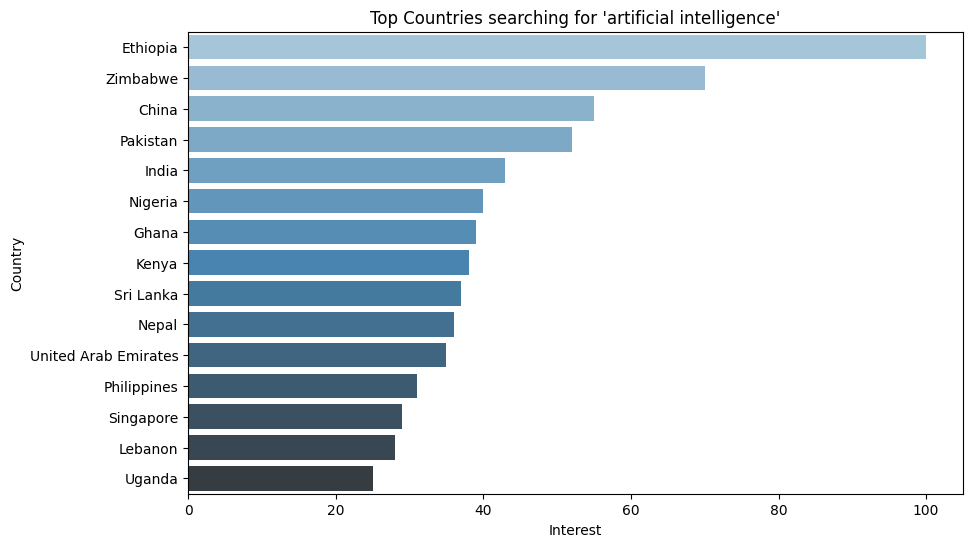

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_data[keyword], y=region_data.index, hue=region_data.index, palette="Blues_d", legend=False)
plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")  
plt.ylabel("Country")
plt.show()


In [9]:
import time
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
keyword = 'artificial intelligence'

# Wait before building the payload
time.sleep(5)  # Add delay here
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')


# world map

In [10]:
import plotly.express as px

region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',  # correct parameter name
                    locationmode='country names',
                    color=keyword,
                    title=f"Search interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()


# time wise interest

In [11]:
time_df = pytrends.interest_over_time()

/home/sakshi/.venvs/jupyter/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



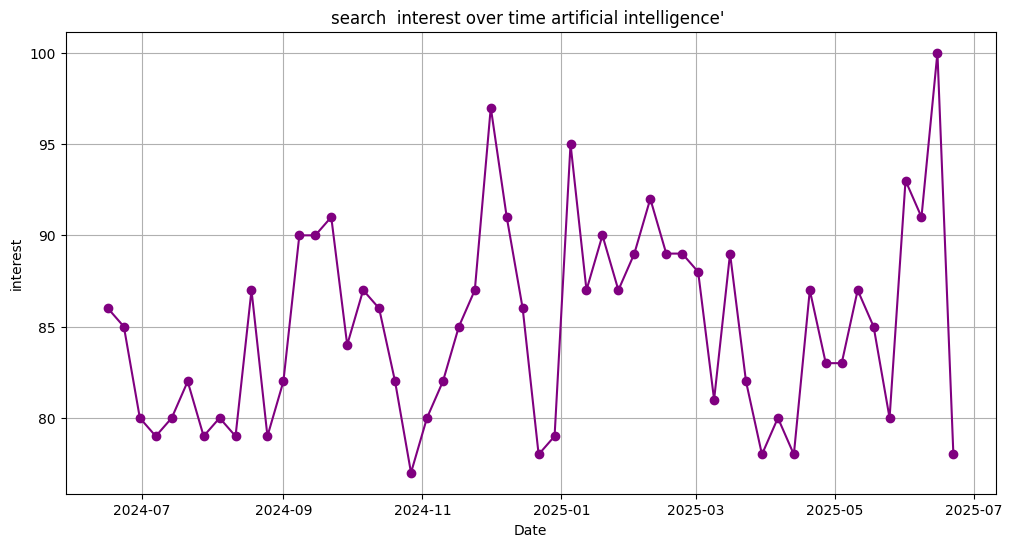

In [12]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword], marker = 'o',color = 'purple')
plt.title(f"search  interest over time {keyword}' ")
plt.xlabel("Date")
plt.ylabel("interest")
plt.grid(True)
plt.show()
          

# multiple keywords compare 

In [13]:
kw_list = ["cloud computing " , "data science" , "machine learning"]
pytrends.build_payload(kw_list, cat= 0, timeframe = 'today 12-m',geo = '',gprop='')

/home/sakshi/.venvs/jupyter/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



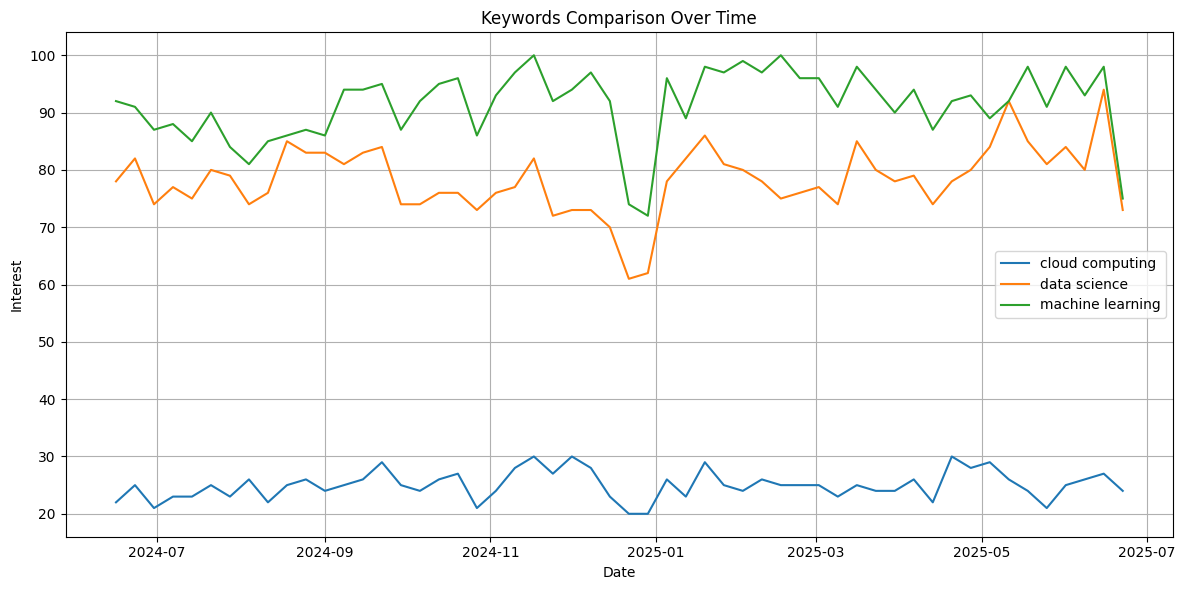

In [14]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("Keywords Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
